In [ ]:
!pip install --upgrade scikit-learn
!pip install skimpy
!pip install shap
!pip install catboost

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import numpy as np
import pandas as pd
import time
import joblib
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
#from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from skimpy import skim
import shap
from sklearn.utils import resample

In [ ]:
path = ("/content/drive/MyDrive/Colab Notebooks/data/Soil Nutrients.csv")
data = pd.read_csv(path)
data

,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,N_Ratio,P_Ratio,K_Ratio
0,Strawberry,Moderate,Day Neutral,20.887923,747.860765,6.571548,13.091483,533.762876,91.197196,170.800381,118.670058,243.331211,20.369555,low_acidic,Loam,Summer,10.0,10.0,10.0
1,Strawberry,Moderate,Day Neutral,18.062721,711.104329,6.251806,13.063016,505.789101,91.939623,179.290364,121.020244,246.910378,20.402751,low_acidic,Loam,Spring,10.0,10.0,10.0
2,Strawberry,Moderate,Short Day Period,16.776782,774.038247,6.346916,12.945927,512.985617,91.387286,181.440732,116.936806,242.699601,19.158847,low_acidic,Loam,Summer,10.0,10.0,10.0
3,Strawberry,Moderate,Short Day Period,14.281000,665.633506,6.259598,13.318922,484.860067,91.254598,176.165282,122.233153,237.096892,20.265745,low_acidic,Loam,Summer,10.0,10.0,10.0
4,Strawberry,Moderate,Day Neutral,21.444490,806.531455,6.384368,13.312915,512.747307,92.354829,182.935334,126.088234,243.880364,20.397336,low_acidic,Loam,Spring,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15395,Green Peas,Moderate,Short Day Period,18.237489,1079.572958,6.777649,6.913269,314.935840,65.057374,150.515721,48.860186,124.688035,4.977256,neutral,Sandy,Fall,5.0,10.0,10.0
15396,Green Peas,Moderate,Short Day Period,16.603638,958.201820,5.839441,6.829060,345.860296,66.747340,144.310767,44.647790,121.589160,4.987133,neutral,Sandy,Fall,5.0,10.0,10.0
15397,Green Peas,Moderate,Short Day Period,12.154144,947.899222,6.499094,6.938902,320.293737,65.803531,147.068405,42.351771,120.392912,5.043142,low_acidic,Sandy,Fall,5.0,10.0,10.0
15398,Green Peas,Moderate,Short Day Period,17.493029,863.902923,5.940159,6.778806,300.501265,64.563183,144.416616,44.405726,119.291683,4.687349,low_acidic,Sandy,Spring,5.0,10.0,10.0


In [ ]:
data.dropna(inplace=True)

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['float64']).columns

print("Categorical Columns:", list(categorical_columns))
print("Numerical Columns:", list(numerical_columns))

Categorical Columns: ['Name', 'Fertility', 'Photoperiod', 'Category_pH', 'Soil_Type', 'Season']
Numerical Columns: ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'Nitrogen', 'Phosphorus', 'Potassium', 'Yield', 'N_Ratio', 'P_Ratio', 'K_Ratio']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for col in categorical_columns:
    print(f"Column: {col}")
    print(data[col].value_counts())
    print("\n")

Column: Name
Name
Strawberry        700
Watermelon        700
Grapes            700
Arugula           700
Beet              700
Chard             700
Cress             700
Endive            700
Kale              700
Lettuce           700
Radicchio         700
Spinach           700
Tomatoes          700
Eggplants         700
Asparagus         700
Chilli Peppers    700
Cabbage           700
Cucumbers         700
Potatoes          700
Cauliflowers      700
Broccoli          700
Green Peas        700
Name: count, dtype: int64


Column: Fertility
Fertility
High        9800
Moderate    5600
Name: count, dtype: int64


Column: Photoperiod
Photoperiod
Short Day Period    11939
Day Neutral          3121
Long Day Period       340
Name: count, dtype: int64


Column: Category_pH
Category_pH
low_acidic      9466
neutral         4871
low_alkaline    1063
Name: count, dtype: int64


Column: Soil_Type
Soil_Type
Loam          9089
Sandy Loam    5611
Sandy          700
Name: count, dtype: int64


Column

In [ ]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15400  │ │ float64     │ 13    │                                                          │
│ │ Number of columns │ 19     │ │ string      │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column             ┃ NA  ┃ NA %  ┃ mean   ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Temperature        │   0 │     0 │   20.8 │   4.415 │   9.356 │  17.92 │  19.93 │  22.94 │  39.91 │   ██▂  │  │
│ │ Rainfall           │   0 │     0 │  948.8 │   340.9 │   409.9 │  707.8 │  846.6 │   1109 │   2508 │ ██▄▁▁  │  │
│ │ pH                 │   0 │     0 │  6.473 │  0.4491 │   4.889 │  6.246 │  6.466 │  6.697 │  8.023 │  ▂▇█▂  │  │
│ │ Light_Hours        │   0 │     0 │  9.459 │   2.588 │   5.045 │  7.017 │  8.986 │  12.02 │  15.92 │ ▆█▆▄▇▁ │  │
│ │ Light_Intensity    │   0 │     0 │    398 │   190.5 │   69.15 │  265.4 │  385.3 │  508.2 │  985.2 │ ▄██▄ ▁ │  │
│ │ Rh                 │   0 │     0 │  67.12 │   19.01 │   29.88 │  53.01 │  63.25 │     90 │  99.93 │ ▁▆█▅▁█ │  │
│ │ Nitrogen           │   0 │     0 │  142.8 │   58.52 │   41.73 │  117.6 │  140.5 │  160.2 │  409.6 │  ▃█▂   │  │
│ │ Phosphorus         │   0 │     0 │  107.7 │   72.78 │   13.16 │  57.63 │  87.73 │  145.3 │    360 │ █▇▄  ▁ │  │
│ │ Potassium          │   0 │     0 │  180.5 │     104 │   34.98 │  107.3 │  163.9 │  223.2 │    580 │ ▆█▃▁ ▁ │  │
│ │ Yield              │   0 │     0 │  22.75 │   15.54 │  0.7702 │  11.98 │  21.23 │  28.81 │  66.62 │ ▆▇█ ▂▂ │  │
│ │ N_Ratio            │   0 │     0 │  12.64 │   14.03 │       5 │     10 │     10 │     10 │     75 │   █    │  │
│ │ P_Ratio            │   0 │     0 │   11.7 │   5.762 │      10 │     10 │     10 │     10 │   37.5 │   █    │  │
│ │ K_Ratio            │   0 │     0 │  12.48 │   7.805 │       5 │     10 │     10 │     10 │   37.5 │ █▁   ▁ │  │
│ └────────────────────┴─────┴───────┴────────┴─────────┴─────────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Name      │  0 │    0 │ Beet      │ Chilli    │ Arugula   │ Watermelo │      7.91 │       1.1 │      16800 │  │
│ │           │    │      │           │ Peppers   │           │ n         │           │           │            │  │
│ │ Fertility │  0 │    0 │ High      │ Moderate  │ High      │ Moderate  │      5.45 │         1 │      15400 │  │
│ │ Photoperi │  0 │    0 │ Day       │ Short Day │ Day 

<Figure size 1500x1000 with 0 Axes>

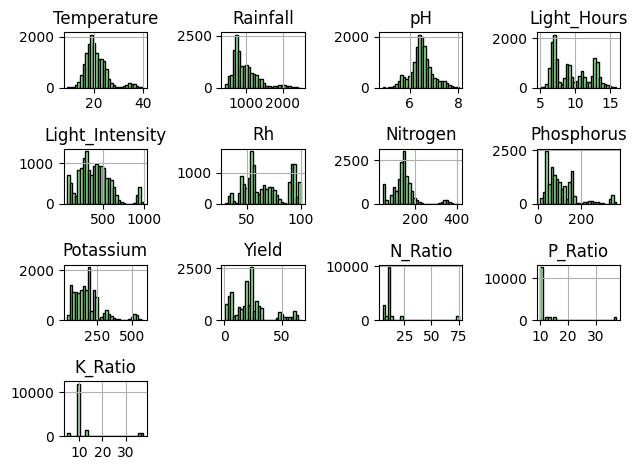

<ipython-input-44-6b23b53af4c0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Greens')
<ipython-input-44-6b23b53af4c0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Greens')
<ipython-input-44-6b23b53af4c0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Greens')
<ipython-input-44-6b23b53af4c0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

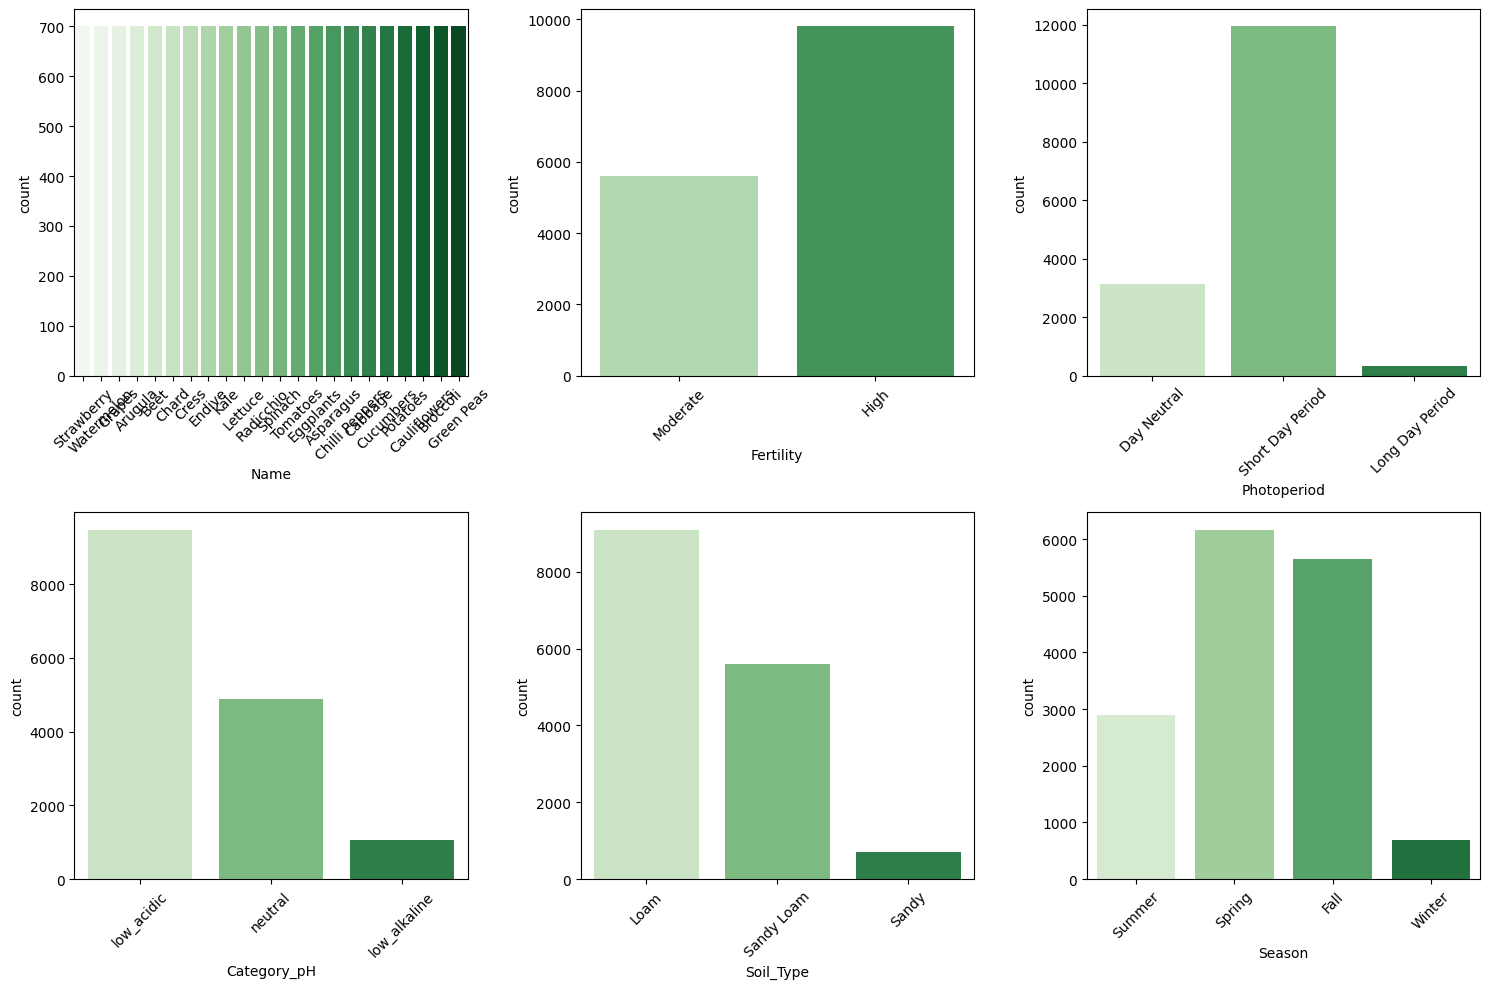

In [ ]:
plt.figure(figsize=(15, 10))
data.hist(bins=30, color='lightgreen', edgecolor='black')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=data, palette='Greens')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

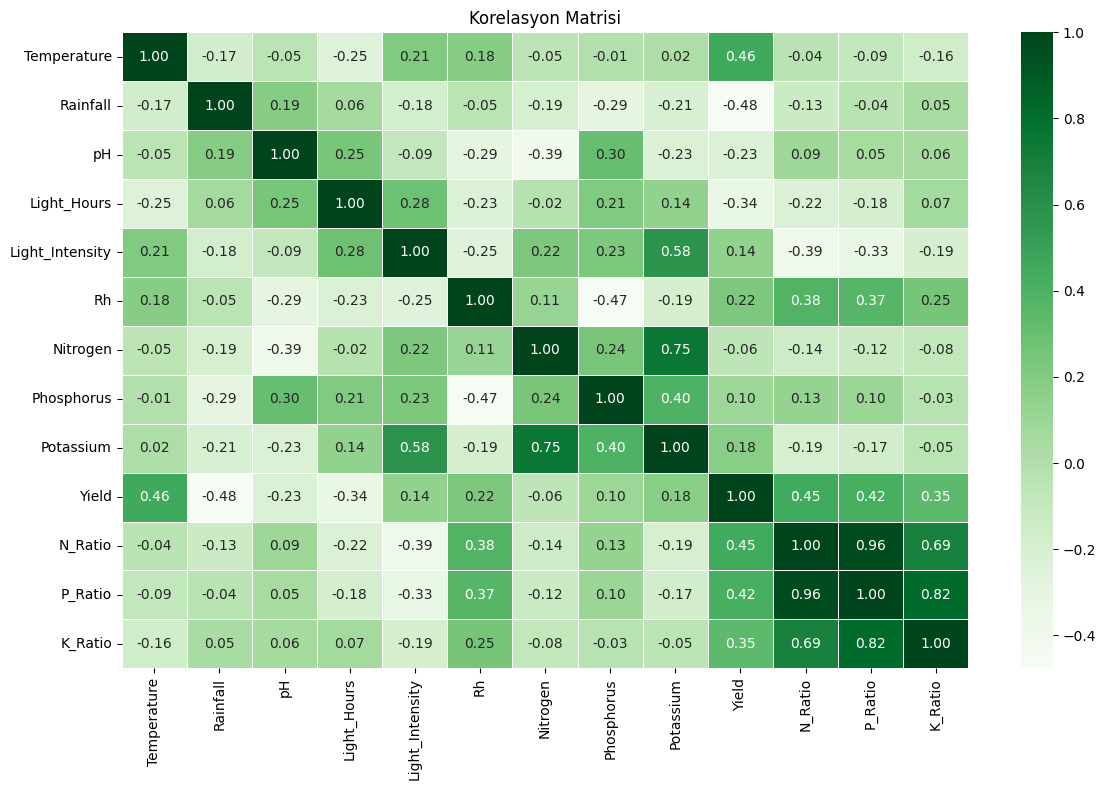

In [ ]:
numcol = data.select_dtypes(include=np.number).columns
cmatrix = data[numcol].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cmatrix, annot=True, cmap='Greens', fmt='.2f', linewidth=0.5)
plt.title('Korelasyon Matrisi')
plt.tight_layout()
plt.show()

In [ ]:
time_series_data = data.groupby('Season')['Yield'].mean()

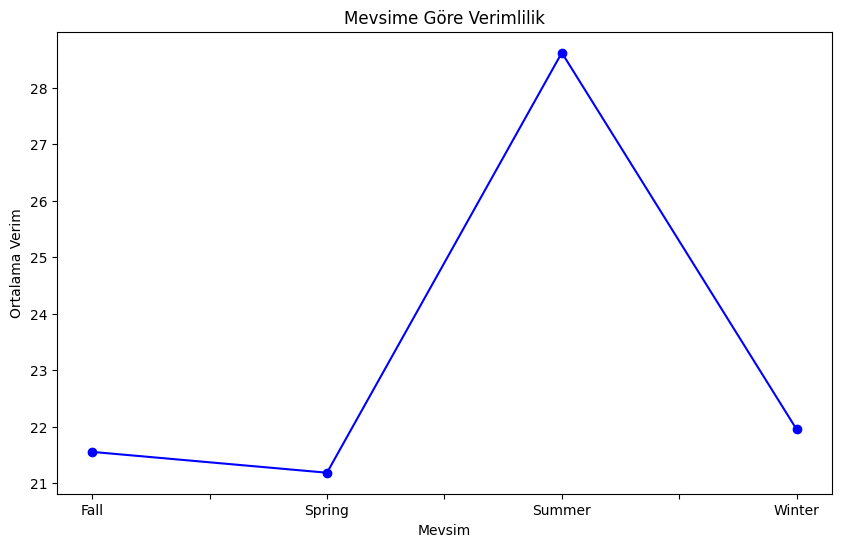

In [ ]:
plt.figure(figsize=(10, 6))
time_series_data.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title("Mevsime Göre Verimlilik")
plt.xlabel("Mevsim")
plt.ylabel("Ortalama Verim")
plt.show()

In [ ]:
def balance_dataset(dataframe, target_col='soil_nutrient', sample_type='down'):
    dataframe.reset_index(drop=True, inplace=True)
    classes = dataframe[target_col].unique()
    df_class_list = []

    for cls in classes:
        df_class = dataframe[dataframe[target_col] == cls]
        df_class_list.append(df_class)

    if sample_type == 'down':
        min_class_size = min([len(df) for df in df_class_list])
        df_downsampled_list = [resample(df_class, replace=False, n_samples=min_class_size) for df_class in df_class_list]
        df_downsampled = pd.concat(df_downsampled_list)
        df_downsampled.reset_index(drop=True, inplace=True)

        return df_downsampled

    elif sample_type == 'up':
        max_class_size = max([len(df) for df in df_class_list])
        df_upsampled_list = [resample(df_class, replace=True, n_samples=max_class_size) for df_class in df_class_list]
        df_upsampled = pd.concat(df_upsampled_list)
        df_upsampled.reset_index(drop=True, inplace=True)

        return df_upsampled

    else:
        return dataframe

In [ ]:
data['Season'].value_counts()

,count
Season,
Spring,6164
Fall,5652
Summer,2892
Winter,692


In [ ]:
balanced_data = balance_dataset(data, target_col='Season', sample_type='up')

In [ ]:
balanced_data['Season'].value_counts()

,count
Season,
Summer,6164
Spring,6164
Fall,6164
Winter,6164


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_absolute_error, precision_score, f1_score, recall_score, roc_curve, auc, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.exceptions import NotFittedError
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import xgboost
import lightgbm
from tqdm import tqdm
from uuid import uuid4


In [ ]:
models = {
#    'Logistic Regression': linear_model.LogisticRegression(max_iter=200, multi_class='multinomial'),
#    'SGD Classifier': linear_model.SGDClassifier(),
#    'Linear Support Vector Classifier': svm.LinearSVC(multi_class='ovr', max_iter=1000, class_weight='balanced'),
#    'KNeighbors Classifier': neighbors.KNeighborsClassifier(n_neighbors=5),
#    'RBF Support Vector Machine ' : svm.SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
#    'Gaussian Naive Bayes': naive_bayes.GaussianNB(),
    'Decision Tree Classifier': tree.DecisionTreeClassifier(),
    'Hist Gradient Boosting Classifier': ensemble.HistGradientBoostingClassifier(),
    'Random Forest Classifier': ensemble.RandomForestClassifier(n_estimators=100),
    'Extra Tree Class' : ensemble.ExtraTreesClassifier(n_estimators=100, random_state=42),
#    'MLP Classfier': MLPClassifier(hidden_layer_sizes=(100, 50),  activation='relu',solver='adam',alpha=1e-4, learning_rate='adaptive',max_iter=500,early_stopping=True,random_state=42),
    'XGBoost Classifier': xgboost.XGBClassifier(objective='multi:softprob',num_class=4,eval_metric='mlogloss',learning_rate=0.1,max_depth=6,n_estimators=100,subsample=0.8,colsample_bytree=0.8,gamma=0.1,reg_alpha=0.1,reg_lambda=1,random_state=42),
#    'LightGBM Classifier': lightgbm.LGBMClassifier(objective='multiclass',num_class=4,metric='multi_logloss', learning_rate=0.1,max_depth=6,num_leaves=31,n_estimators=100,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.1,reg_lambda=1.0,random_state=42),
#    'CatBoost Classifier': CatBoostClassifier(iterations=100,depth=6,learning_rate=0.1, loss_function='MultiClass',verbose=0,random_state=42),
    'Bagging Classifier': BaggingClassifier(estimator=tree.DecisionTreeClassifier(), n_estimators=50, random_state=42),
#    'AdaBoost Classifier': AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=1), n_estimators=50,learning_rate=0.5,random_state=42)
}

In [ ]:
def train_models(models, x_data, y_data, categorical_columns, save=False, preprocessor=None):
    # Convert inputs to numpy arrays if they are pandas objects
    if isinstance(x_data, (pd.DataFrame, pd.Series)):
        x_data = x_data.to_numpy()
    if isinstance(y_data, (pd.DataFrame, pd.Series)):
        y_data = y_data.to_numpy()

    classes = ['Fall', 'Spring', 'Summer', 'Winter']
    n_classes = len(classes)

    # Initialize lists to store results
    trained_models = []
    cms = []
    accuracies = []
    maes = []
    precisions = []
    recalls = []
    f1s = []
    roc_aucs = []
    time_for_each_training = []
    loss_logs = {}

    # Split data
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, y_data, train_size=0.9, shuffle=True, stratify=y_data
    )

    for key in models:
        print(f'Training model: {key}')
        start = time.time()

        # Create pipeline
        pipe = Pipeline([
            ('Preprocessor', preprocessor) if preprocessor else ('Identity', preprocessing.FunctionTransformer()),
            (key, models[key])
        ])

        # Cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(pipe, x_train, y_train, cv=cv, scoring='accuracy')

        # Train model
        pipe.fit(x_train, y_train)
        preds = pipe.predict(x_test)

        # Compute metrics
        accuracy = accuracy_score(y_test, preds)
        mae = mean_absolute_error(y_test, preds)
        precision = precision_score(y_test, preds, average='weighted')
        recall = recall_score(y_test, preds, average='weighted')
        f1 = f1_score(y_test, preds, average='weighted')

        # Per-class metrics
        print(f"\nPer-class metrics for {key}:")
        print(classification_report(y_test, preds, target_names=classes))

        # Save model if requested
        if save:
            joblib.dump(pipe, f"{key}.pkl")

        # Store metrics
        trained_models.append(pipe)
        cms.append(confusion_matrix(y_test, preds))
        accuracies.append(accuracy)
        maes.append(mae)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

        # ROC-AUC (One-vs-Rest)
        if hasattr(pipe.named_steps[key], 'predict_proba'):
            try:
                probs = pipe.named_steps[key].predict_proba(x_test)
                roc_auc = roc_auc_score(y_test, probs, multi_class='ovr', average='weighted')
                roc_aucs.append(roc_auc)

                # Plot ROC curve
                plt.figure(figsize=(8, 6))
                y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
                for i in range(n_classes):
                    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
                    roc_auc_i = auc(fpr, tpr)
                    plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc_i:.2f})')

                plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve (OvR) for {key}')
                plt.legend(loc='lower right')
                plt.show()
                plt.savefig(f'roc_curve_{key}.png')
                plt.close()
            except Exception as e:
                print(f"Failed to compute ROC-AUC for {key}: {e}")
                roc_aucs.append(np.nan)
        else:
            roc_aucs.append(np.nan)

        # Loss Plot for supported models
        if key in ['XGBoost Classifier', 'LightGBM Classifier', 'Hist Gradient Boosting Classifier']:
            try:
                eval_set = [(x_train, y_train), (x_test, y_test)]
                loss_logs[key] = {}

                if key == 'XGBoost Classifier':
                    model = xgboost.XGBClassifier(
                        objective='multi:softprob', num_class=4, eval_metric='mlogloss',
                        learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8,
                        colsample_bytree=0.8, gamma=0.1, reg_alpha=0.1, reg_lambda=1,
                        random_state=42
                    )
                    model.fit(x_train, y_train, eval_set=eval_set, verbose=False)
                    loss_logs[key] = model.evals_result()
                    train_loss = loss_logs[key]['validation_0']['mlogloss']
                    test_loss = loss_logs[key]['validation_1']['mlogloss']

                elif key == 'LightGBM Classifier':
                    model = lightgbm.LGBMClassifier(
                        objective='multiclass', num_class=4, metric='multi_logloss',
                        learning_rate=0.1, max_depth=6, num_leaves=31, n_estimators=100,
                        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=1.0,
                        random_state=42
                    )
                    model.fit(x_train, y_train, eval_set=eval_set, eval_metric='multi_logloss', verbose=-1)
                    loss_logs[key] = model.evals_result_
                    train_loss = loss_logs[key]['training']['multi_logloss']
                    test_loss = loss_logs[key]['valid_1']['multi_logloss']

                elif key == 'Hist Gradient Boosting Classifier':
                    model = HistGradientBoostingClassifier(
                        early_stopping=True, validation_fraction=0.1, random_state=42
                    )
                    model.fit(x_train, y_train)
                    # Validation scores are stored as 1 - loss, so we negate for log loss approximation
                    train_loss = [1 - score for score in model.train_score_]
                    test_loss = [1 - score for score in model.validation_score_]
                    loss_logs[key] = {'train_loss': train_loss, 'validation_loss': test_loss}

                # Plot loss curve
                plt.figure(figsize=(8, 6))
                plt.plot(train_loss, label='Train Loss')
                plt.plot(test_loss, label='Test Loss')
                plt.xlabel('Iteration')
                plt.ylabel('Log Loss' if key != 'Hist Gradient Boosting Classifier' else 'Approx. Log Loss')
                plt.title(f'Training Loss Curve for {key}')
                plt.legend()
                plt.savefig(f'loss_curve_{key}.png')
                plt.show()
                plt.close()
            except Exception as e:
                print(f"Failed to plot loss for {key}: {e}")

        end = time.time()
        total_time = end - start
        time_for_each_training.append(total_time)

        # Print metrics
        print(f'Cross-Validation Accuracy (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')
        print(f'Test Accuracy: {accuracy:.4f} | MAE: {mae:.4f} | Precision: {precision:.4f} | '
              f'Recall: {recall:.4f} | F1: {f1:.4f} | ROC-AUC: {roc_aucs[-1] if not np.isnan(roc_aucs[-1]) else "N/A"} | '
              f'Time: {total_time:.4f}s\n')

    return trained_models, cms, [accuracies, maes, precisions, recalls, f1s, roc_aucs], time_for_each_training

def make_scores_table(scores, models, training_time):
    score_names = ['Accuracy', 'MAE', 'Precision', 'Recall', 'F1', 'ROC-AUC']
    scores_dict = {'Training Time (s)': training_time}
    for i, name in enumerate(score_names):
        scores_dict[name] = [f'{s:.4f}' if not np.isnan(s) else 'N/A' for s in scores[i]]
    return pd.DataFrame(scores_dict, index=list(models.keys()))

In [ ]:
label_encoders = {col: preprocessing.LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    balanced_data[col] = label_encoders[col].fit_transform(balanced_data[col])

In [ ]:
if 'Yield' in balanced_data.columns:
    balanced_data.drop(columns=['Yield'], inplace=True)

In [ ]:
target = 'Season'
x_data = balanced_data.drop(columns=[target])
y_data = balanced_data[target]
model_scores_dict = {}
preprocessor = preprocessing.StandardScaler()

In [ ]:
categorical_cols = ['Fertility', 'Photoperiod', 'Category_pH', 'Soil_Type', 'Name']
numerical_cols = x_data.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_cols)

In [ ]:
x_data['NPK_Total'] = x_data['Nitrogen'] + x_data['Phosphorus'] + x_data['Potassium']
x_data['Nitrogen_Rainfall'] = x_data['Nitrogen'] * x_data['Rainfall']
x_data['Temp_Light'] = x_data['Temperature'] * x_data['Light_Hours']

In [ ]:
if 'pH' in x_data.columns and 'pH_Binned' not in x_data.columns:
    x_data['pH_Binned'] = pd.cut(x_data['pH'], bins=[0, 5.5, 7.5, 14], labels=['Acidic', 'Neutral', 'Alkaline'])

In [ ]:
scaler = StandardScaler()
x_data[numerical_cols] = scaler.fit_transform(x_data[numerical_cols])

categorical_cols_extended = categorical_cols + (['pH_Binned'] if 'pH_Binned' in x_data.columns else [])
x_data = pd.get_dummies(x_data, columns=categorical_cols_extended, drop_first=True)

In [ ]:
x_data.shape, x_data.columns[:10]

((24656, 45),
 Index(['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh',
        'Nitrogen', 'Phosphorus', 'Potassium', 'N_Ratio'],
       dtype='object'))

Training model: Decision Tree Classifier

Per-class metrics for Decision Tree Classifier:
              precision    recall  f1-score   support

        Fall       0.84      0.81      0.83       617
      Spring       0.83      0.81      0.82       616
      Summer       0.89      0.92      0.90       616
      Winter       0.97      1.00      0.98       617

    accuracy                           0.88      2466
   macro avg       0.88      0.88      0.88      2466
weighted avg       0.88      0.88      0.88      2466



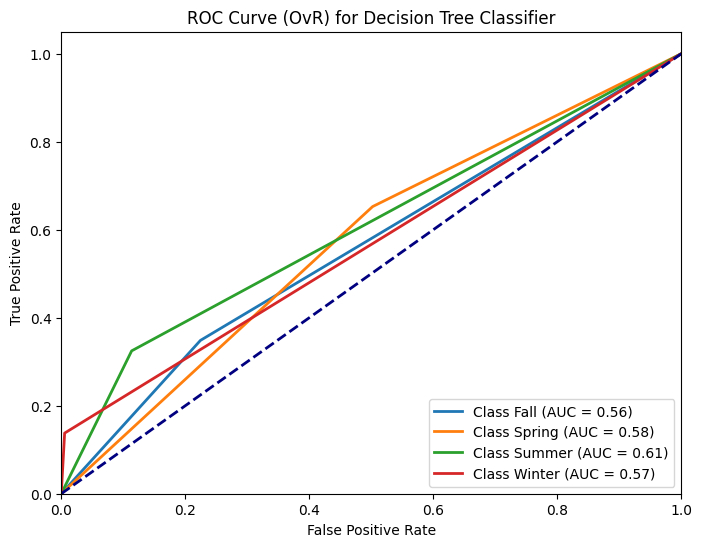

Cross-Validation Accuracy (mean ± std): 0.8495 ± 0.0032
Test Accuracy: 0.8848 | MAE: 0.1480 | Precision: 0.8834 | Recall: 0.8848 | F1: 0.8838 | ROC-AUC: 0.5772351746013186 | Time: 9.8157s

Training model: Hist Gradient Boosting Classifier

Per-class metrics for Hist Gradient Boosting Classifier:
              precision    recall  f1-score   support

        Fall       0.78      0.70      0.74       617
      Spring       0.81      0.63      0.71       616
      Summer       0.76      0.94      0.84       616
      Winter       0.92      1.00      0.96       617

    accuracy                           0.82      2466
   macro avg       0.82      0.82      0.81      2466
weighted avg       0.82      0.82      0.81      2466



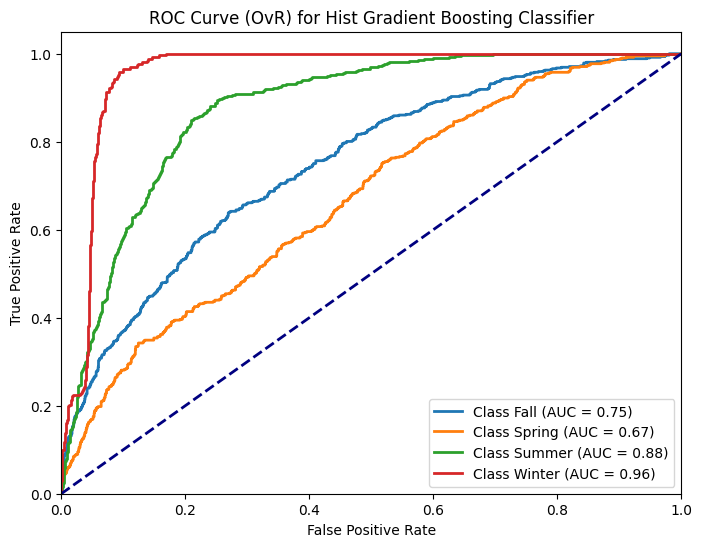

Failed to plot loss for Hist Gradient Boosting Classifier: name 'HistGradientBoostingClassifier' is not defined
Cross-Validation Accuracy (mean ± std): 0.7872 ± 0.0053
Test Accuracy: 0.8163 | MAE: 0.2530 | Precision: 0.8161 | Recall: 0.8163 | F1: 0.8099 | ROC-AUC: 0.812097843699617 | Time: 34.4546s

Training model: Random Forest Classifier

Per-class metrics for Random Forest Classifier:
              precision    recall  f1-score   support

        Fall       0.87      0.81      0.84       617
      Spring       0.87      0.77      0.82       616
      Summer       0.84      0.95      0.89       616
      Winter       0.96      1.00      0.98       617

    accuracy                           0.88      2466
   macro avg       0.88      0.88      0.88      2466
weighted avg       0.88      0.88      0.88      2466



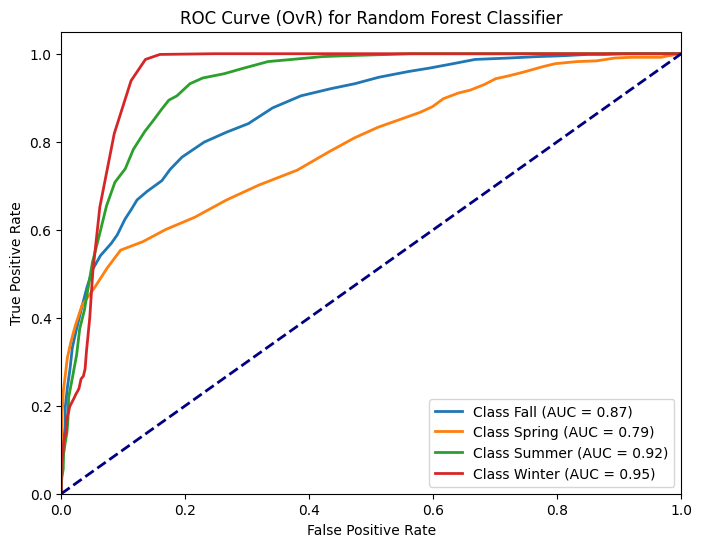

Cross-Validation Accuracy (mean ± std): 0.8432 ± 0.0050
Test Accuracy: 0.8848 | MAE: 0.1549 | Precision: 0.8849 | Recall: 0.8848 | F1: 0.8828 | ROC-AUC: 0.8826349390252742 | Time: 33.2345s

Training model: Extra Tree Class

Per-class metrics for Extra Tree Class:
              precision    recall  f1-score   support

        Fall       0.86      0.81      0.84       617
      Spring       0.85      0.79      0.82       616
      Summer       0.86      0.94      0.90       616
      Winter       0.96      1.00      0.98       617

    accuracy                           0.89      2466
   macro avg       0.88      0.89      0.88      2466
weighted avg       0.88      0.89      0.88      2466



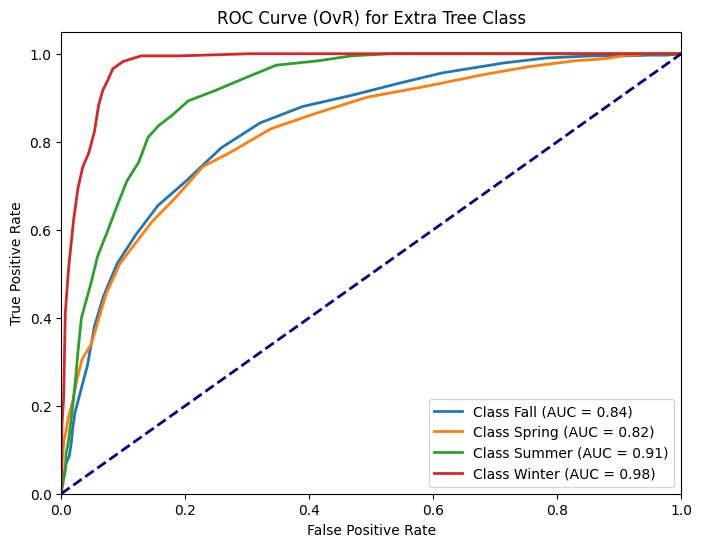

Cross-Validation Accuracy (mean ± std): 0.8434 ± 0.0045
Test Accuracy: 0.8856 | MAE: 0.1472 | Precision: 0.8846 | Recall: 0.8856 | F1: 0.8840 | ROC-AUC: 0.8874557408466249 | Time: 15.4725s

Training model: XGBoost Classifier

Per-class metrics for XGBoost Classifier:
              precision    recall  f1-score   support

        Fall       0.69      0.52      0.59       617
      Spring       0.72      0.41      0.53       616
      Summer       0.63      0.90      0.74       616
      Winter       0.81      1.00      0.89       617

    accuracy                           0.71      2466
   macro avg       0.71      0.71      0.69      2466
weighted avg       0.71      0.71      0.69      2466



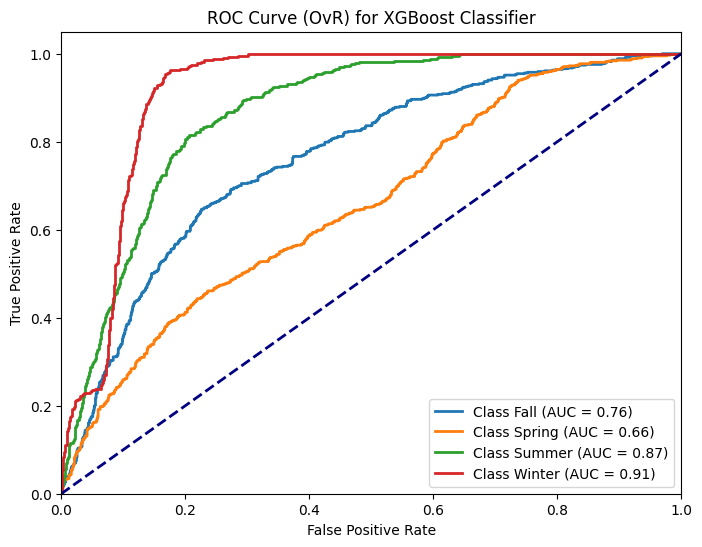

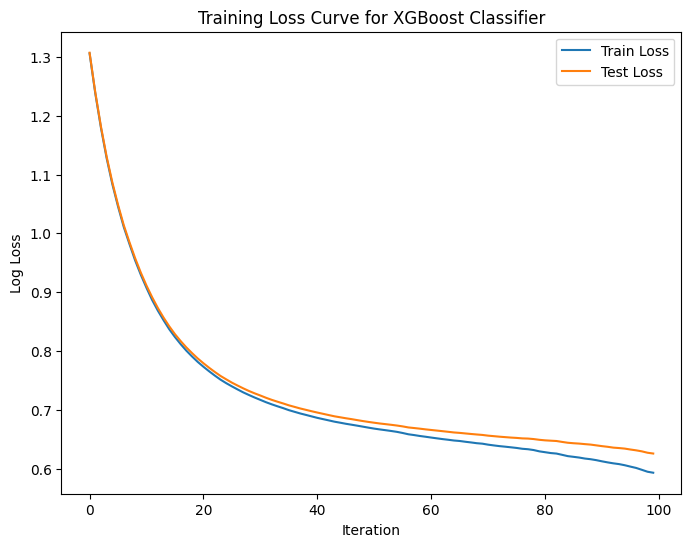

Cross-Validation Accuracy (mean ± std): 0.6952 ± 0.0046
Test Accuracy: 0.7088 | MAE: 0.4092 | Precision: 0.7116 | Recall: 0.7088 | F1: 0.6885 | ROC-AUC: 0.7998487554044909 | Time: 15.4877s

Training model: Bagging Classifier

Per-class metrics for Bagging Classifier:
              precision    recall  f1-score   support

        Fall       0.85      0.82      0.83       617
      Spring       0.88      0.78      0.82       616
      Summer       0.85      0.94      0.89       616
      Winter       0.96      1.00      0.98       617

    accuracy                           0.88      2466
   macro avg       0.88      0.88      0.88      2466
weighted avg       0.88      0.88      0.88      2466



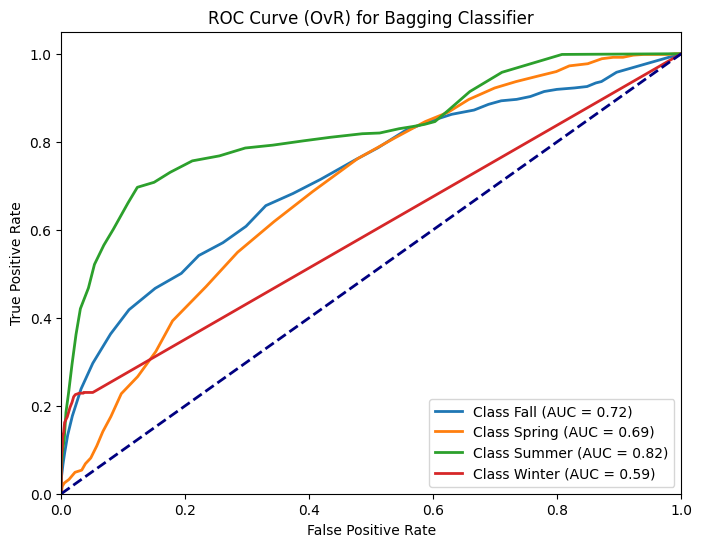

Cross-Validation Accuracy (mean ± std): 0.8488 ± 0.0030
Test Accuracy: 0.8844 | MAE: 0.1561 | Precision: 0.8842 | Recall: 0.8844 | F1: 0.8828 | ROC-AUC: 0.7073432220952679 | Time: 115.1307s



In [ ]:
trained_models, cms, scores, time_took = train_models(models, x_data, y_data, categorical_columns=categorical_cols, save=False, preprocessor=preprocessor)
model_scores_dict['Standard Training'] = [f'{s*100:.2f}%' for s in scores[0]]

In [ ]:
standard_training_table = make_scores_table(scores, models, time_took)
standard_training_table

,Training Time (s),Accuracy,MAE,Precision,Recall,F1,ROC-AUC
Decision Tree Classifier,9.815727,0.8848,0.1480,0.8834,0.8848,0.8838,0.5772
Hist Gradient Boosting Classifier,34.454619,0.8163,0.2530,0.8161,0.8163,0.8099,0.8121
Random Forest Classifier,33.234516,0.8848,0.1549,0.8849,0.8848,0.8828,0.8826
Extra Tree Class,15.472523,0.8856,0.1472,0.8846,0.8856,0.8840,0.8875
XGBoost Classifier,15.487700,0.7088,0.4092,0.7116,0.7088,0.6885,0.7998
Bagging Classifier,115.130731,0.8844,0.1561,0.8842,0.8844,0.8828,0.7073


1st attempt

<Figure size 640x480 with 0 Axes>

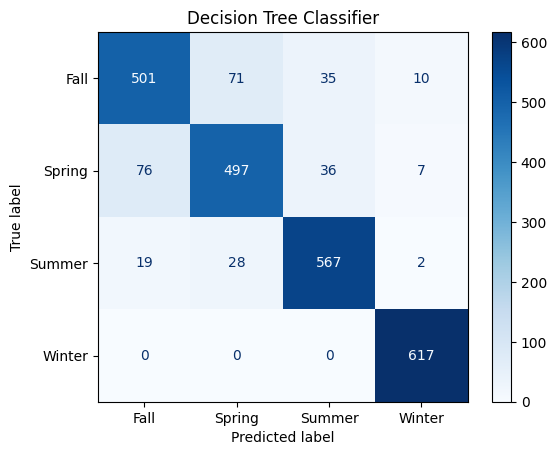

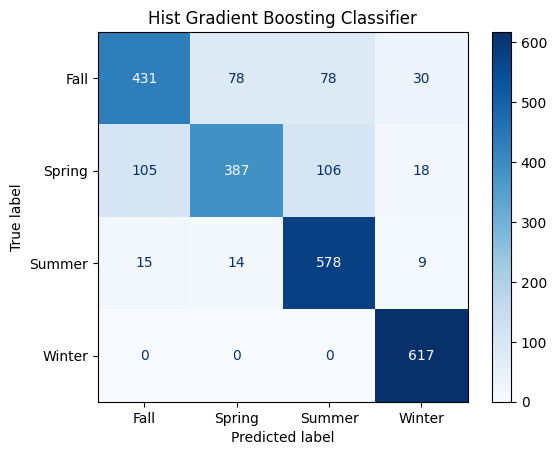

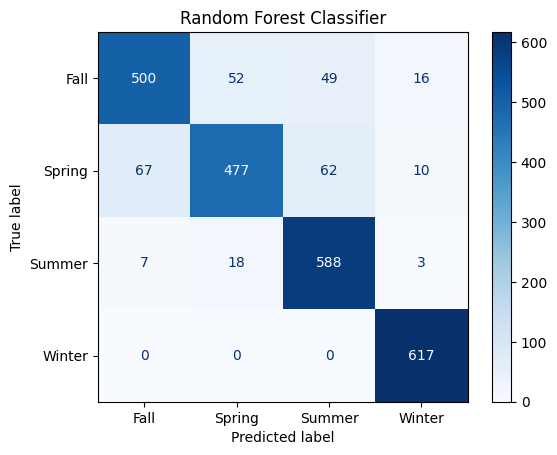

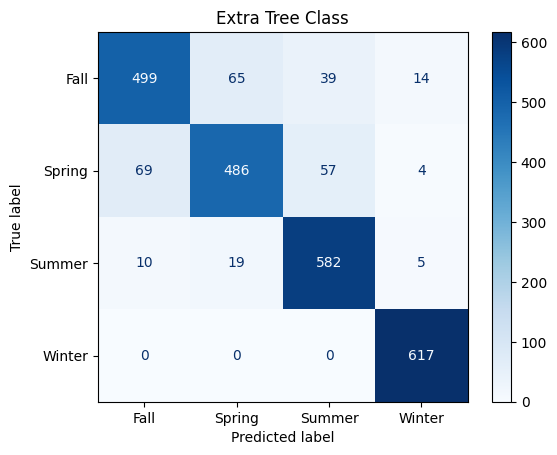

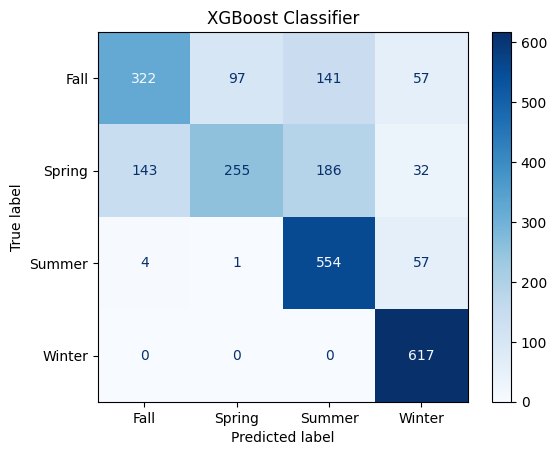

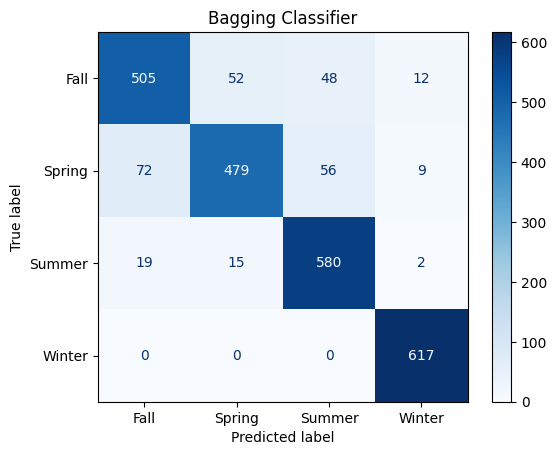

In [ ]:
plt.figure()
plt.tight_layout()
for n, cm in enumerate(cms):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Fall', 'Spring','Summer','Winter'])
    disp.plot(cmap='Blues')
    plt.title(list(models.keys())[n])

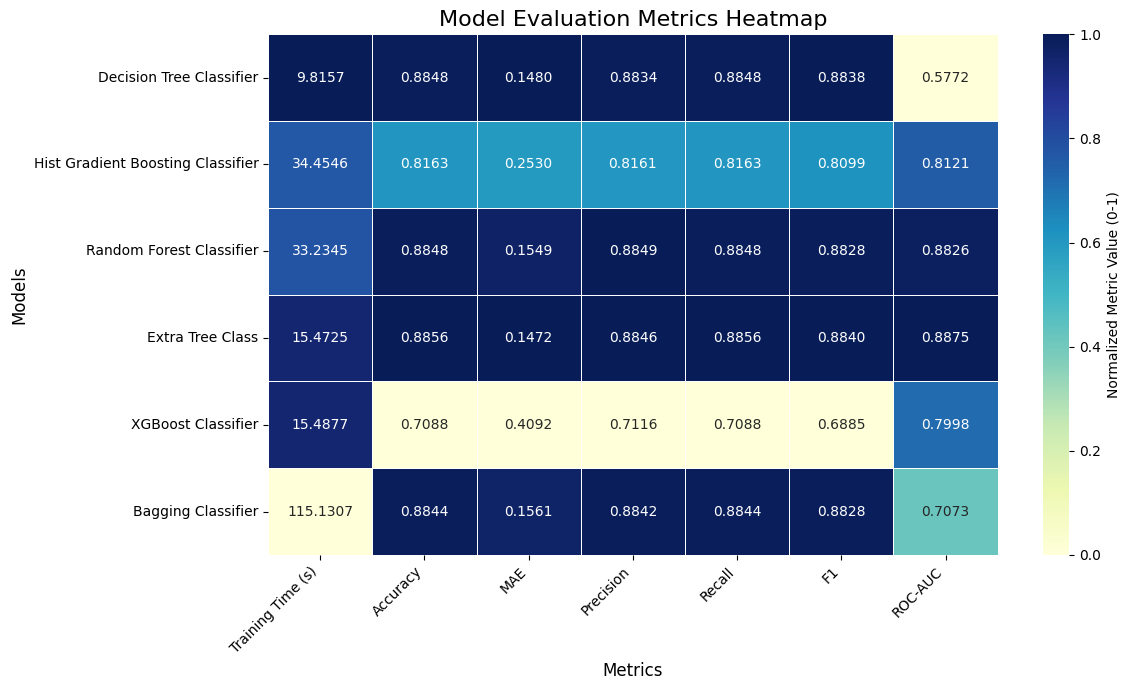


Original Evaluation Metrics Table:
                                   Training Time (s)  Accuracy     MAE  \
Decision Tree Classifier                      9.8157    0.8848  0.1480   
Hist Gradient Boosting Classifier            34.4546    0.8163  0.2530   
Random Forest Classifier                     33.2345    0.8848  0.1549   
Extra Tree Class                             15.4725    0.8856  0.1472   
XGBoost Classifier                           15.4877    0.7088  0.4092   
Bagging Classifier                          115.1307    0.8844  0.1561   

                                   Precision  Recall      F1  ROC-AUC  
Decision Tree Classifier              0.8834  0.8848  0.8838   0.5772  
Hist Gradient Boosting Classifier     0.8161  0.8163  0.8099   0.8121  
Random Forest Classifier              0.8849  0.8848  0.8828   0.8826  
Extra Tree Class                      0.8846  0.8856  0.8840   0.8875  
XGBoost Classifier                    0.7116  0.7088  0.6885   0.7998  
Bagging Class

In [ ]:
data_for_table = {
    'Training Time (s)': [9.8157, 34.4546, 33.2345, 15.4725, 15.4877, 115.1307],
    'Accuracy': ['0.8848', '0.8163', '0.8848', '0.8856', '0.7088', '0.8844'],
    'MAE': ['0.1480', '0.2530', '0.1549', '0.1472', '0.4092', '0.1561'],
    'Precision': ['0.8834', '0.8161', '0.8849', '0.8846', '0.7116', '0.8842'],
    'Recall': ['0.8848', '0.8163', '0.8848', '0.8856', '0.7088', '0.8844'],
    'F1': ['0.8838', '0.8099', '0.8828', '0.8840', '0.6885', '0.8828'],
    'ROC-AUC': ['0.5772', '0.8121', '0.8826', '0.8875', '0.7998', '0.7073']
}
models_list = [
    'Decision Tree Classifier',
    'Hist Gradient Boosting Classifier',
    'Random Forest Classifier',
    'Extra Tree Class',
    'XGBoost Classifier',
    'Bagging Classifier'
]
standard_training_table = pd.DataFrame(data_for_table, index=models_list)

# Convert string metrics to numeric, handling 'N/A'
# We will convert all relevant columns to numeric type.
# 'Training Time (s)' is already numeric.
metrics_to_convert = ['Accuracy', 'MAE', 'Precision', 'Recall', 'F1', 'ROC-AUC']

for col in metrics_to_convert:
    # Replace 'N/A' with NaN and then convert to float
    standard_training_table[col] = standard_training_table[col].replace('N/A', np.nan).astype(float)

# Select only the performance metrics for the heatmap (excluding 'Training Time (s)' for now, or include if desired)
# Let's include Training Time (s) as well, as it's an important evaluation metric.
# We will normalize MAE and Training Time (s) for better visualization in a single heatmap
# where higher values are generally better for other metrics.

# Create a copy to avoid modifying the original table if it's used elsewhere
heatmap_data = standard_training_table.copy()

# For MAE and Training Time (s), lower is better. To make them visually consistent with other metrics
# where higher is better, we can invert them or scale them differently.
# A common approach is to scale them to a 0-1 range, then invert for 'lower is better' metrics.

# Normalize all metrics to a 0-1 scale for consistent color mapping
# For 'MAE' and 'Training Time (s)', we want lower values to be 'better' (e.g., darker green).
# For 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC', higher values are better.

# Let's create a normalized version for visualization
heatmap_normalized = pd.DataFrame(index=heatmap_data.index, columns=heatmap_data.columns)

for col in heatmap_data.columns:
    if col in ['MAE', 'Training Time (s)']:
        # For 'lower is better' metrics, normalize and then subtract from 1
        min_val = heatmap_data[col].min()
        max_val = heatmap_data[col].max()
        if max_val == min_val: # Avoid division by zero if all values are the same
            heatmap_normalized[col] = 0.5 # Neutral value
        else:
            heatmap_normalized[col] = 1 - ((heatmap_data[col] - min_val) / (max_val - min_val))
    else:
        # For 'higher is better' metrics, just normalize
        min_val = heatmap_data[col].min()
        max_val = heatmap_data[col].max()
        if max_val == min_val:
            heatmap_normalized[col] = 0.5 # Neutral value
        else:
            heatmap_normalized[col] = (heatmap_data[col] - min_val) / (max_val - min_val)

# Set up the matplotlib figure and axes
plt.figure(figsize=(12, 7))

# Create the heatmap
# Using 'viridis' colormap where higher values (closer to 1) are yellow/green, and lower values are purple/blue.
# For inverted metrics (MAE, Training Time), 1 means 'best' (lowest original value), 0 means 'worst' (highest original value).
sns.heatmap(
    heatmap_normalized,
    annot=heatmap_data, # Annotate with original values
    fmt=".4f",          # Format annotations to 4 decimal places
    cmap="YlGnBu",     # Colormap (you can experiment with 'YlGnBu', 'Greens', 'Blues', 'RdYlGn' etc.)
    linewidths=.5,      # Lines between cells
    linecolor='white',  # Color of the lines
    cbar_kws={'label': 'Normalized Metric Value (0-1)'} # Color bar label
)

plt.title('Model Evaluation Metrics Heatmap', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\nOriginal Evaluation Metrics Table:")
print(standard_training_table)